In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,c
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.duplicated().sum()

0

In [6]:
df.shape

(101, 18)

In [8]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [9]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [16]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

Text(0, 0.5, 'count')

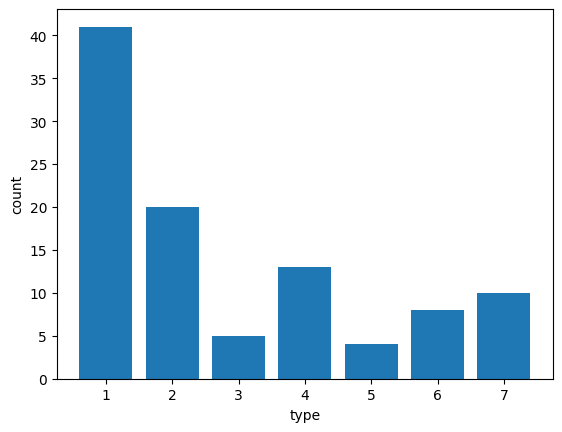

In [25]:
#the distribution of animal data across the types of classes.
plt.bar(df['type'].value_counts().index,df['type'].value_counts())
plt.xlabel('type')
plt.ylabel('count')

In [27]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
## as u see all the attributes  are encoded using dummy encoding so we should dummy encode the legs attribute
df=pd.get_dummies(df,columns=['legs'])

In [31]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,False,False,True,False,False,False
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,False,False,True,False,False,False
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,True,False,False,False,False,False
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,False,False,True,False,False,False
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,False,False,True,False,False,False


In [34]:
X=df.drop(['animal name','type'],axis=1)
Y=df['type']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

In [37]:
#Grid search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [40]:
model=KNeighborsClassifier()


In [41]:
n_neighbors=np.array(range(1,10))
param_grid=dict(n_neighbors=n_neighbors)


In [42]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=10)

In [43]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [44]:
grid.best_params_

{'n_neighbors': 1}

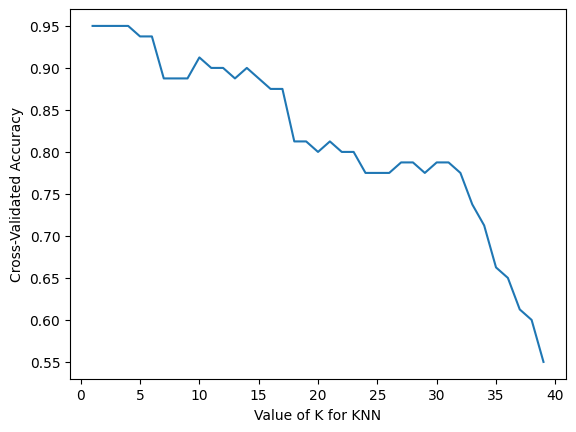

In [61]:
from sklearn.model_selection import cross_val_score
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [62]:
# we can see that when k increases accuracy decreases for higher values of k


In [46]:
model=KNeighborsClassifier(n_neighbors=1)

In [47]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_pred=model.predict(X_test)

In [51]:
accuracy_score(Y_test,y_pred)

0.9523809523809523

In [52]:
confusion_matrix(Y_test,y_pred)

array([[8, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

In [55]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



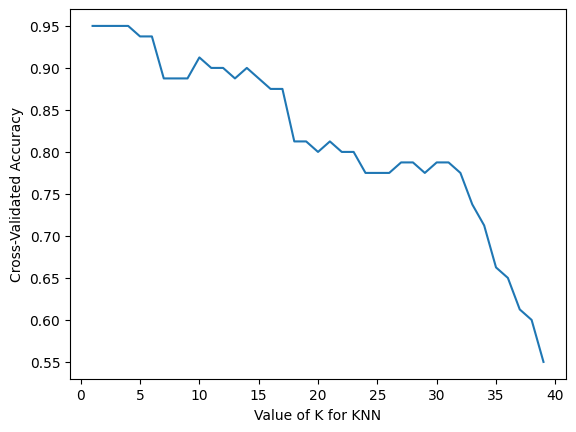